In [22]:
import numpy as np

price = np.array([6, 6.05, 6.1])
volume = np.array([802000, 967000, 1132000])

profit = price * volume
cost = 0.55 * profit
gross_profit = profit - cost 
oper_cost = 0.15 * gross_profit
net_profit = gross_profit - oper_cost 
tax = net_profit * 0.32
cash_flow = net_profit - tax


cash_flow = np.append(-3400000, cash_flow )
npv = np.npv(0.1,cash_flow)
irr = np.irr(cash_flow)

print(volume)  
print(cash_flow) 
print(npv)
print(irr)




[ 802000  967000 1132000]
[-3400000.     1251601.2    1521676.035  1796042.52 ]
344796.1010518393
0.15331410149124514
[3.44796101e+05 1.00000000e+00]


In [58]:
import numpy.random as npr

npr.seed(69)

npv_all = []
irr_all = []

for i in range(10000): 
    price = npr.triangular([5.9,5.95,6], [6,6.05,6.1],  [6.1,6.15,6.2] , 3)
    volume = npr.normal([802,967,1132], [25,30,25], 3) * 1000
    cost_coef = npr.triangular(0.5, 0.55, 0.65) 
    oper_coef = npr.normal(0.15, 0.02) 
    
    cash_flow = ( 1 -  cost_coef ) * (1 - oper_coef ) * ( 1 - 0.32) * price * volume   
    cash_flow = np.append(-3400000, cash_flow )
    npv_i = np.npv(0.1,cash_flow)
    irr_i = np.irr(cash_flow)
    
    
    npv_all = np.append(npv_all, npv_i)
    irr_all = np.append(irr_all, np.irr(cash_flow))

    

#print(npv_all)
#print(irr_all)



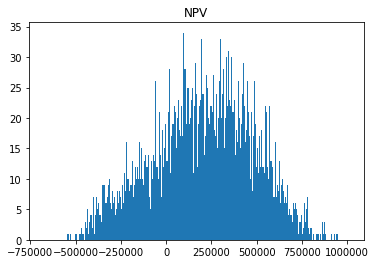

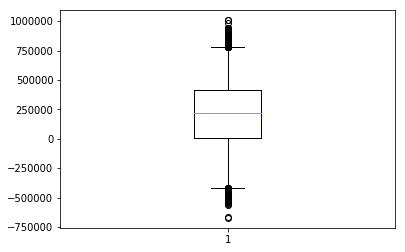

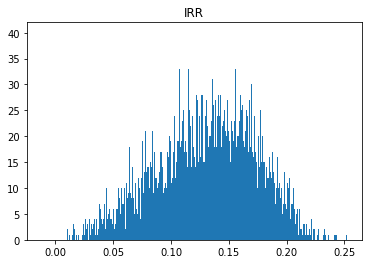

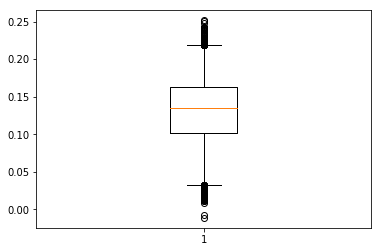

In [59]:
import matplotlib.pyplot as plt 

plt.hist(npv_all, bins=1000, align='mid',histtype='bar') 
plt.title('NPV') 
plt.show()

plt.boxplot(npv_all, whis=[1, 99],  widths=0.2)
plt.show()

plt.hist(irr_all, bins=1000, align='mid',histtype='bar') 
plt.title('IRR') 
plt.show()

plt.boxplot(irr_all, whis=[1, 99],  widths=0.2)
plt.show()

